In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dropout

from sklearn.model_selection import train_test_split

In [2]:
pulsar_file = 'HTRU2/HTRU_2.csv'
    
    
pulsar_file_df = pd.DataFrame(pd.read_csv(pulsar_file, header=None))
#add headers
pulsar_file_df.columns = ['mean_ip', 'std_ip', 'kurtosis_ip', 'skewness_ip',
                            'mean_dm', 'std_dm', 'kurtosis_dm', 'skewness_dm',"class"]

features = pulsar_file_df.columns
print(features)
featureVector = pulsar_file_df[features[:-1]] #data vector
targets = pulsar_file_df['class'] #labels


pipeX = StandardScaler()
featureVector = pipeX.fit_transform(featureVector) # normalize data
X_train, X_test, y_train, y_test = train_test_split(featureVector, targets, test_size=0.25, random_state=3)
print(np.mean(X_train[:,4]))


Index(['mean_ip', 'std_ip', 'kurtosis_ip', 'skewness_ip', 'mean_dm', 'std_dm',
       'kurtosis_dm', 'skewness_dm', 'class'],
      dtype='object')
0.003343255388419448


### Big network with the use of autoencoder decoder



In [9]:
y_train = np.array(y_train)
X_train = np.array(X_train)
print(np.shape(np.array(X_train)),np.shape(np.array(y_train)))
print(y_train)
# defining model
simpleAnn = Sequential()

simpleAnn.add(Dense(64, activation = 'relu'))
#simpleAnn.add(Dropout(0.1))
simpleAnn.add(Dense(32, activation = 'relu'))

simpleAnn.add(Dense(16, activation = 'relu'))
simpleAnn.add(Dense(8, activation = 'relu'))
simpleAnn.add(Dense(1, activation = 'sigmoid'))
#simpleAnn.add(Dense(8, activation = 'relu'))
#simpleAnn.add(Dense(16, activation = 'relu'))
#simpleAnn.add(Dense(32, activation = 'relu'))
#simpleAnn.add(Dense(64, activation = 'relu'))
#simpleAnn.add(Dense(1, activation = 'sigmoid'))

epochs = 10
batch_size=32
#simpleAnn.Dropout(0.1),
simpleAnn.compile(loss='binary_crossentropy', optimizer='adam',metrics=["Precision","Recall","Accuracy"])
history = simpleAnn.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)
fig = simpleAnn.summary()
#ig.savefig('model.png')

(13423, 8) (13423,)
[0 0 0 ... 0 0 0]
Epoch 1/10
420/420 [==============================] - 2s 2ms/step - loss: 0.1310 - precision: 0.8665 - recall: 0.7893 - Accuracy: 0.9695
Epoch 2/10
420/420 [==============================] - 1s 2ms/step - loss: 0.0699 - precision: 0.9334 - recall: 0.8404 - Accuracy: 0.9798
Epoch 3/10
420/420 [==============================] - 1s 2ms/step - loss: 0.0677 - precision: 0.9324 - recall: 0.8493 - Accuracy: 0.9805
Epoch 4/10
420/420 [==============================] - 1s 2ms/step - loss: 0.0664 - precision: 0.9354 - recall: 0.8452 - Accuracy: 0.9804
Epoch 5/10
420/420 [==============================] - 1s 2ms/step - loss: 0.0648 - precision: 0.9300 - recall: 0.8501 - Accuracy: 0.9803
Epoch 6/10
420/420 [==============================] - 1s 2ms/step - loss: 0.0646 - precision: 0.9287 - recall: 0.8549 - Accuracy: 0.9806
Epoch 7/10
420/420 [==============================] - 1s 2ms/step - loss: 0.0647 - precision: 0.9342 - recall: 0.8517 - Accuracy: 0.9809
Epo

420/420 [==============================] - 2s 2ms/step - loss: 0.0655 - precision: 0.8955 - recall: 0.8963 - Accuracy: 0.9809
the score for test is: 
[0.07518704235553741, 0.8811880946159363, 0.8790123462677002, 0.9783239960670471]
the score for train is: 
[0.0655105784535408, 0.895546555519104, 0.8962723016738892, 0.9808779954910278]
['loss', 'precision', 'recall', 'Accuracy']


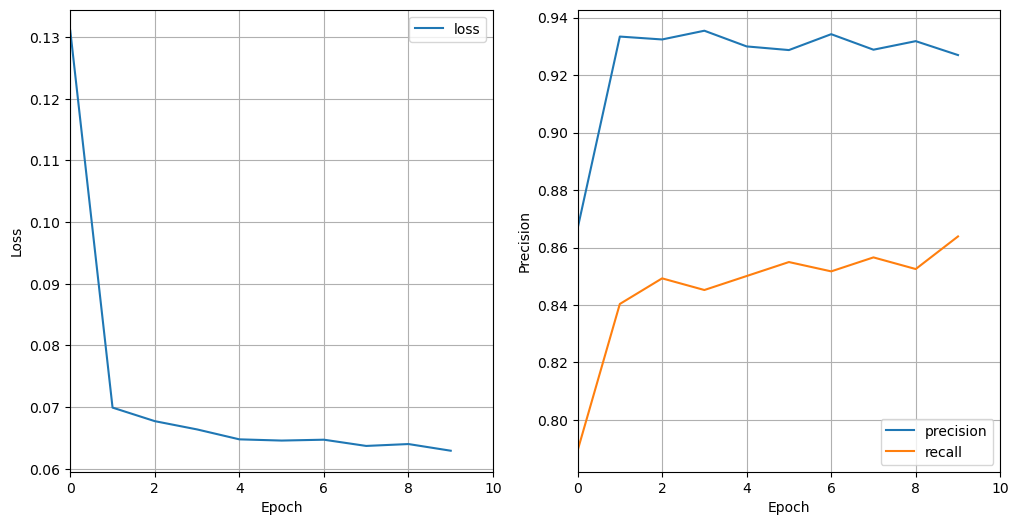

In [10]:
y_pred = simpleAnn.evaluate(X_test, y_test)
y_pred2 = simpleAnn.evaluate(X_train, y_train)

print("the score for test is: ")
print(y_pred)


print("the score for train is: ")
print(y_pred2)
print(simpleAnn.metrics_names)


fig = plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(np.arange(epochs), history.history['loss'], label = "loss")
#savefig('loss.png', bbox_inches='tight')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.xlim(0,epochs)
plt.legend()
#plt.ylim(0,0.25)
plt.grid()
plt.subplot(1,2,2)
plt.plot(np.arange(epochs), history.history['precision'],label = "precision")
plt.plot(np.arange(epochs), history.history['recall'],label = "recall")
fig.savefig('R_P.png', bbox_inches='tight')
plt.xlabel("Epoch")
plt.ylabel("Precision")
plt.xlim(0,epochs)
plt.legend()
#plt.ylim(0.9,1)
plt.grid()
fig.savefig('test.png')

### Neural net with few layers



In [ ]:
y_train = np.array(y_train)
X_train = np.array(X_train)
print(np.shape(np.array(X_train)),np.shape(np.array(y_train)))
print(y_train)
# defining model
simpleAnn = Sequential()
simpleAnn.add(Dropout(0.1))
simpleAnn.add(Dense(64, activation = 'relu'))
simpleAnn.add(Dense(65, activation = 'relu'))
simpleAnn.add(Dense(1, activation = 'sigmoid'))

epochs = 10
batch_size=32
#simpleAnn.Dropout(0.1),
simpleAnn.compile(loss='binary_crossentropy', optimizer='adam',metrics=["Precision","Recall","Accuracy"])
history = simpleAnn.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)


In [ ]:
y_pred = simpleAnn.evaluate(X_test, y_test)
y_pred2 = simpleAnn.evaluate(X_train, y_train)

print("the score for test is: ")
print(y_pred)


print("the score for train is: ")
print(y_pred2)
print(simpleAnn.metrics_names)


plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(np.arange(epochs), history.history['loss'], label = "loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.xlim(0,epochs)
plt.legend()
#plt.ylim(0,0.25)
plt.grid()
plt.subplot(1,2,2)
plt.plot(np.arange(epochs), history.history['precision'],label = "precision")
plt.plot(np.arange(epochs), history.history['recall'],label = "recall")

plt.xlabel("Epoch")
plt.ylabel("Precision")
plt.xlim(0,epochs)
plt.legend()
#plt.ylim(0.9,1)
plt.grid()

### neural net many layers, big dropout


In [ ]:
y_train = np.array(y_train)
X_train = np.array(X_train)
print(np.shape(np.array(X_train)),np.shape(np.array(y_train)))
print(y_train)
# defining model
simpleAnn = Sequential()
simpleAnn.add(Dropout(0.1))
simpleAnn.add(Dense(64, activation = 'relu'))

simpleAnn.add(Dense(1, activation = 'sigmoid'))

epochs = 10
batch_size=32
#simpleAnn.Dropout(0.1),
simpleAnn.compile(loss='binary_crossentropy', optimizer='adam',metrics=["Precision","Recall","Accuracy"])
history = simpleAnn.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)

In [ ]:
y_pred = simpleAnn.evaluate(X_test, y_test)
y_pred2 = simpleAnn.evaluate(X_train, y_train)

print("the score for test is: ")
print(y_pred)


print("the score for train is: ")
print(y_pred2)
print(simpleAnn.metrics_names)


plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(np.arange(epochs), history.history['loss'], label = "loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.xlim(0,epochs)
plt.legend()
#plt.ylim(0,0.25)
plt.grid()
plt.subplot(1,2,2)
plt.plot(np.arange(epochs), history.history['precision'],label = "precision")
plt.plot(np.arange(epochs), history.history['recall'],label = "recall")

plt.xlabel("Epoch")
plt.ylabel("Precision")
plt.xlim(0,epochs)
plt.legend()
#plt.ylim(0.9,1)
plt.grid()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, precision_score

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

# Calculate the recall and precision scores
recall = recall_score(y_test, predictions)
precision = precision_score(y_test, predictions)

# Print the scores
print("Recall:", recall)
print("Precision:", precision)